## Iris Flower Classification
## Task 3
## Muhammad Areeb Alam @ Codsoft

### Importing The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

### Importing The Dataset

In [2]:
iris = pd.read_csv("IRIS.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Facts About The Dataset

In [4]:
# rows and columns in the dataset (row,col)
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exploratory Data Analysis

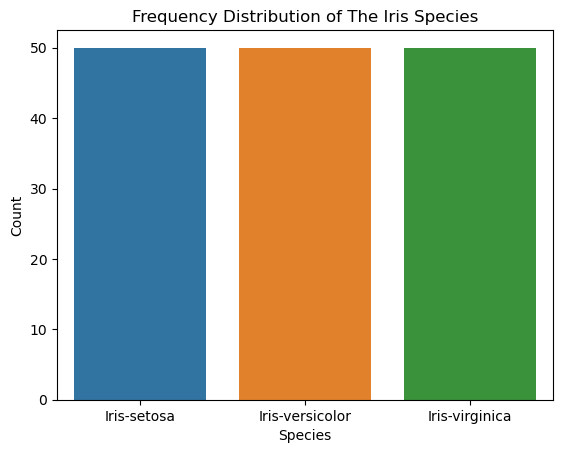

In [7]:
#Frequency distribution of species
sns.countplot(x = iris['species'] , data = iris)
plt.title("Frequency Distribution of The Iris Species")
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

### Distribution Plots


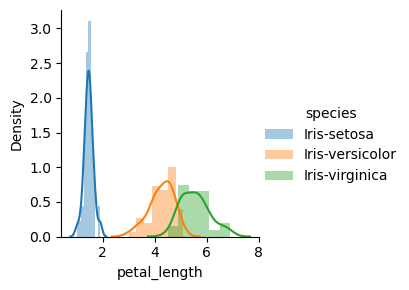

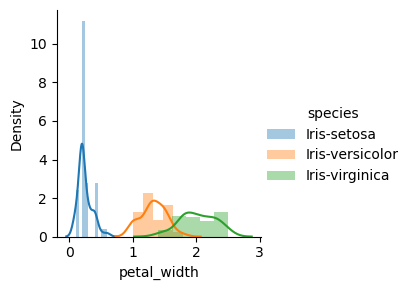

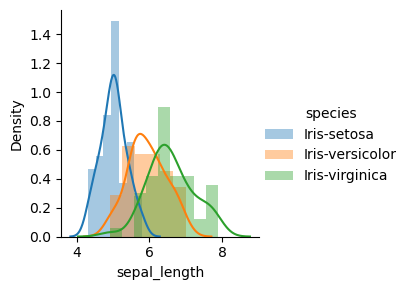

In [8]:
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()

### Box Plot

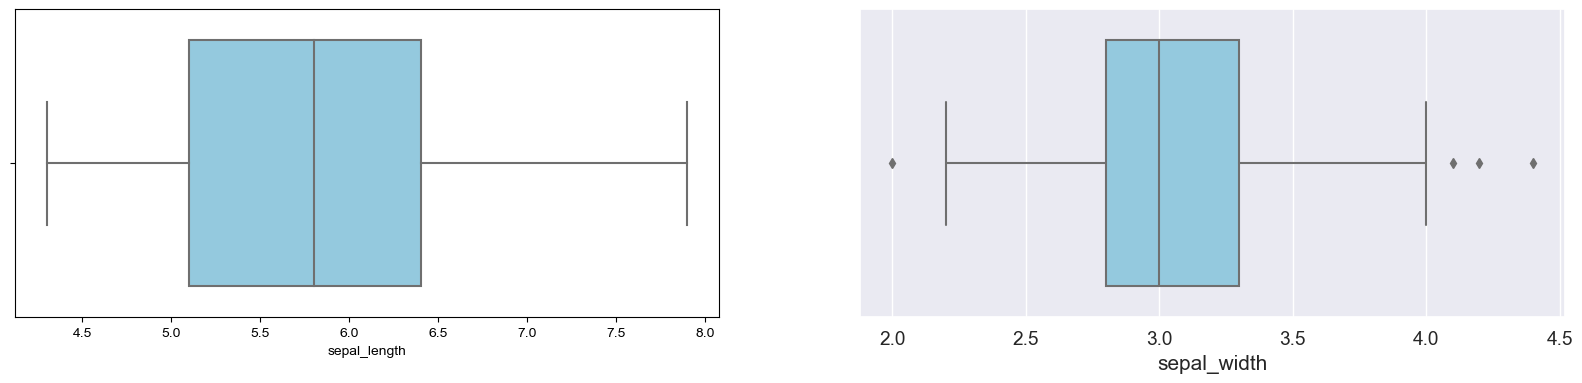

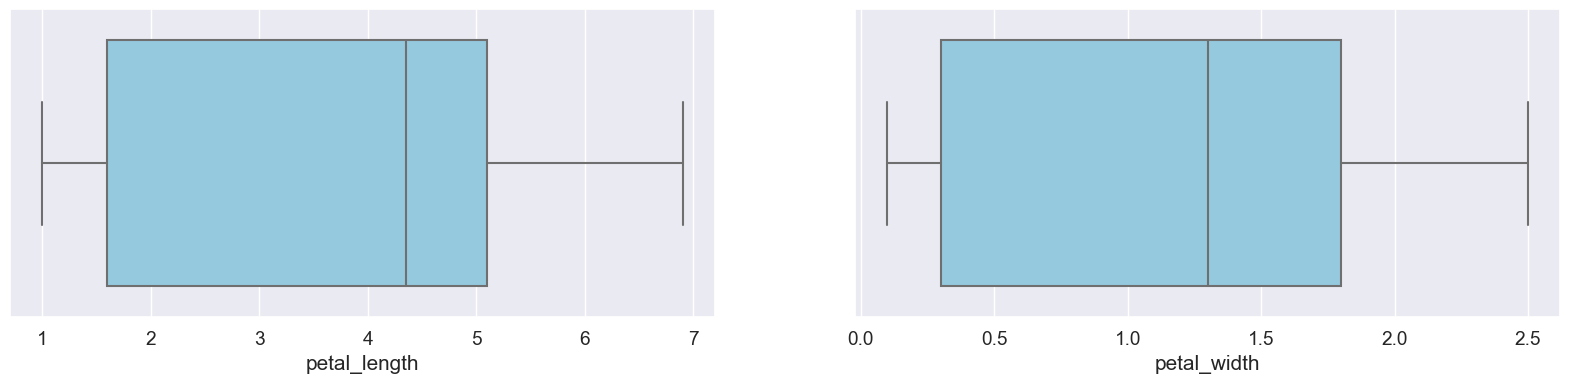

In [9]:
Num = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']

j = 0
while j < 5:
    fig = plt.figure (figsize = [20 , 4])
    plt.subplot(1, 2, 1)
    sns.boxplot (x = Num[j] , data = iris , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    plt.subplot(1, 2, 2)
    sns.boxplot (x = Num[j] , data = iris , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    if j == 4:
        break
    plt.show()

Scatter Plot

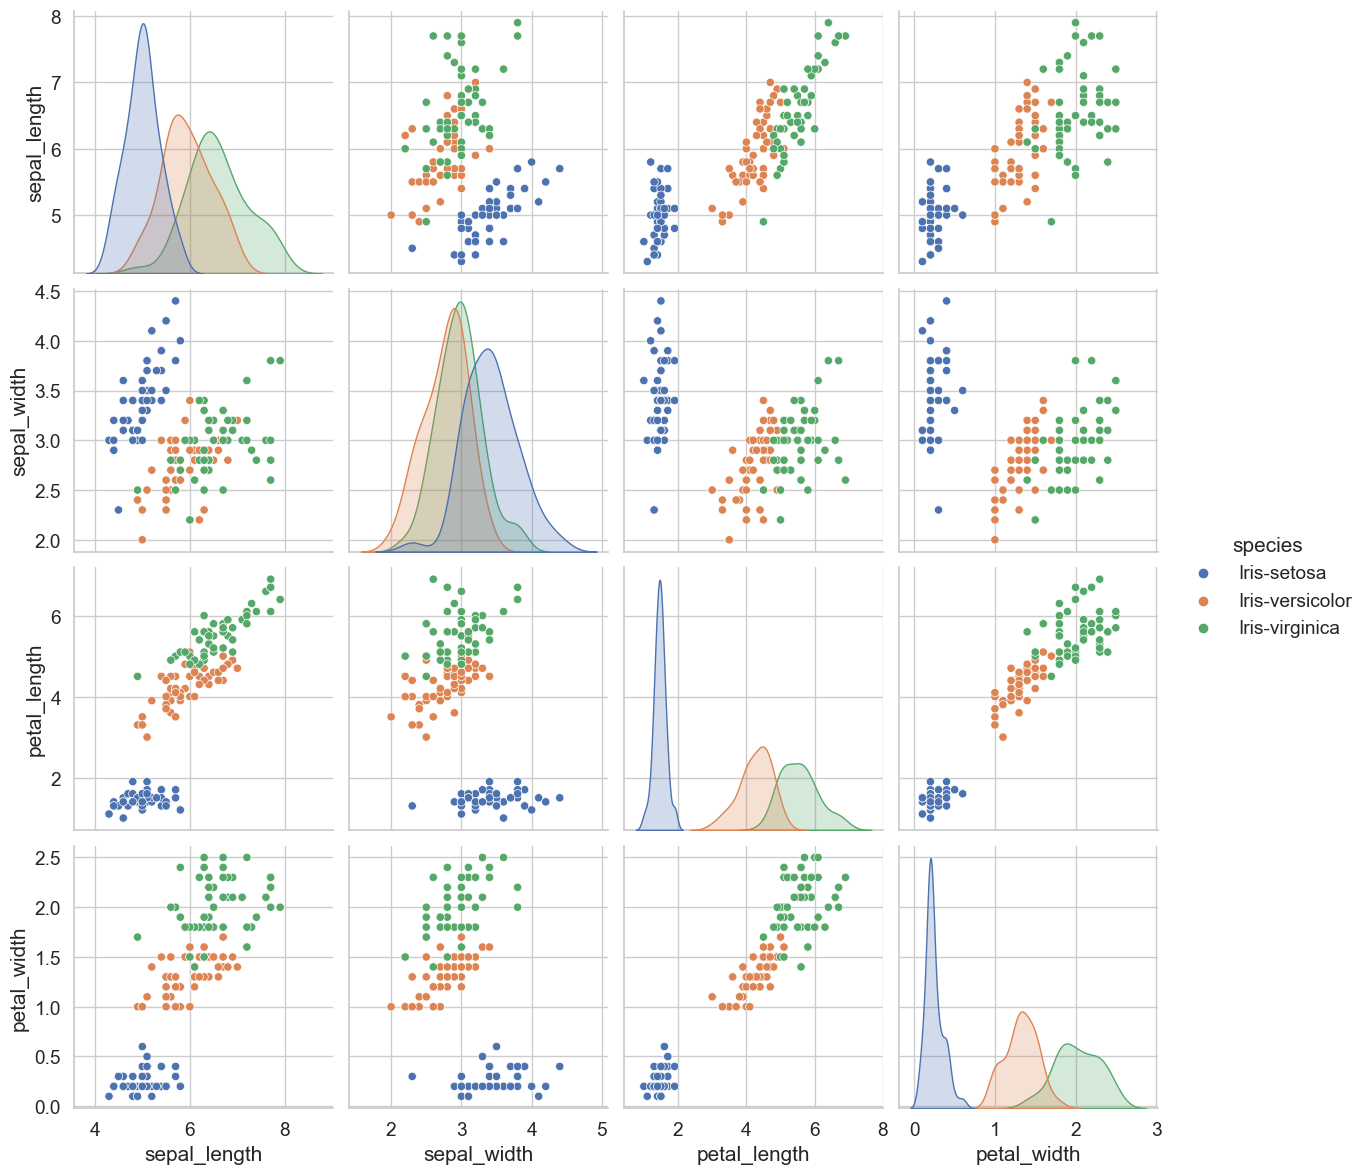

In [10]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3);
plt.show()

### Train Test Split

In [11]:
X = iris[["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]]
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

### Model Building

### Using Logistic Regression

In [12]:
LR = LogisticRegression(max_iter=200)
LR.fit(X_train, y_train)
y_pred_1 = LR.predict(X_test)
LRAcc = accuracy_score(y_test, y_pred_1)
print('Logistic regression accuracy:', round(LRAcc*100,2))

Logistic regression accuracy: 97.78


### Using Random Forest Classifier

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_2 = rf.predict(X_test)
RFCAcc = accuracy_score(y_test, y_pred_2)
print('Random Forest Classifier accuracy:', round(RFCAcc*100,2))

Random Forest Classifier accuracy: 97.78


In [14]:
models = pd.DataFrame ({'Model' : ['Logestic Regression', 'Random Forest'] ,
                        'Precision' : [precision_score(y_test, y_pred_1, average='weighted') , precision_score(y_test, y_pred_2, average='weighted')] ,
                        'Recall' : [recall_score(y_test, y_pred_1, average='weighted') , recall_score(y_test, y_pred_2, average='weighted') ] ,
                        'F1-score' : [f1_score(y_test, y_pred_1, average='weighted') , f1_score(y_test, y_pred_2, average='weighted')] ,
                        'Accuracy' : [accuracy_score(y_test, y_pred_1) , accuracy_score(y_test, y_pred_2)]})

print(tabulate(models, headers='keys', tablefmt='rst'))

====  ===================  ===========  ========  ==========  ==========
  ..  Model                  Precision    Recall    F1-score    Accuracy
====  ===================  ===========  ========  ==========  ==========
   0  Logestic Regression      0.97963  0.977778    0.977943    0.977778
   1  Random Forest            0.97963  0.977778    0.977943    0.977778
====  ===================  ===========  ========  ==========  ==========


### Model Prediction

In [17]:
new_input = pd.DataFrame({
    'sepal_length': [5.3],
    'sepal_width': [3.5],
    'petal_length': [1.4],
    'petal_width': [0.4],
})

# Make predictions on the input data
predictions = rf.predict(new_input)

# Print the predicted rating
print("Predicted Sales:", predictions[0])

Predicted Sales: Iris-setosa
